In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
Sewol = pd.read_csv('./sewol.csv')
Sewol.columns = ["Class_A","Class_B","Class_C","Floor","Position","live","sex","sex_p","name","age","etc","info","info_1","info_2","info_3","info_4"]
Sewol = Sewol.iloc[:,:10]
Sewol = Sewol.fillna({'age':np.round(Sewol['age'].mean()),'Position':Sewol['Position'].mode()[0],'Class_B':Sewol['Class_B'].mode()[0],'Class_C':Sewol['Class_C'].mode()[0]})
Sewol['sex_t'] = np.where(pd.isnull(Sewol['sex']),Sewol['sex_p'],Sewol['sex'])
Sewol = Sewol.drop(['sex','sex_p'],axis=1)
Sewol.head()

,Class_A,Class_B,Class_C,Floor,Position,live,name,age,sex_t
0,선원,갑판부,교대선장,5,앞,생존,이준석,69.0,남
1,선원,갑판부,1등 항해사,5,앞,생존,강원식,42.0,남
2,선원,갑판부,1등 항해사(견습),5,앞,생존,신정훈,34.0,남
3,선원,갑판부,2등 항해사,5,앞,생존,김영호,47.0,남
4,선원,갑판부,3등 항해사,5,앞,생존,박한결,26.0,여


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from c

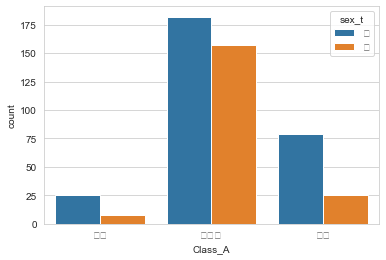

In [44]:
sns.set_style('whitegrid')
sns.countplot(x="Class_A", hue="sex_t", data=Sewol)
plt.show()